In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import to_categorical

import os
import sys  
sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\MWCNN')

from Layers.DTCWT import *
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
nb_classes = 10
batch_size = 32
epochs = 30

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
input_shape = (28, 28, 1)  # CIFAR-10 60,000 32X32 color

# optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
optimizer = SGD(lr=lr, momentum=beta_1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)


In [3]:
# load DWT db2 model
input_shape = (28, 28, 1)  # CIFAR-10 60,000 32X32 color

cplx_input = layers.Input(shape=input_shape)
x = layers.Conv2D(28, (3, 3), padding='same', activation="relu")(cplx_input)
x = DTCWT(2)(x)
x = layers.Conv2D(10, (3, 3), padding='same', activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(nb_classes, activation="softmax")(x)
model = Model(cplx_input, x, name="mymodel")
model.summary()



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
dtcwt (DTCWT)                (None, 56, 56, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 10)        2530      
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 31360)             0         
____________________________________________

In [4]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

In [5]:
history = model.fit(x_train, y_train,
                    validation_split=1 - trainFactor,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 145s - loss: 1.8255 - acc: 0.5769 - val_loss: 0.7651 - val_acc: 0.8543
Epoch 2/30
48000/48000 - 144s - loss: 0.5572 - acc: 0.8482 - val_loss: 0.3507 - val_acc: 0.9032
Epoch 3/30
48000/48000 - 143s - loss: 0.3918 - acc: 0.8854 - val_loss: 0.2905 - val_acc: 0.9172
Epoch 4/30
48000/48000 - 143s - loss: 0.3361 - acc: 0.9026 - val_loss: 0.2602 - val_acc: 0.9269
Epoch 5/30
48000/48000 - 143s - loss: 0.2947 - acc: 0.9149 - val_loss: 0.2315 - val_acc: 0.9367
Epoch 6/30
48000/48000 - 142s - loss: 0.2612 - acc: 0.9251 - val_loss: 0.2060 - val_acc: 0.9428
Epoch 7/30
48000/48000 - 142s - loss: 0.2329 - acc: 0.9336 - val_loss: 0.1868 - val_acc: 0.9498
Epoch 8/30
48000/48000 - 142s - loss: 0.2123 - acc: 0.9387 - val_loss: 0.1694 - val_acc: 0.9553
Epoch 9/30
48000/48000 - 142s - loss: 0.1924 - acc: 0.9461 - val_loss: 0.1559 - val_acc: 0.9581
Epoch 10/30
48000/48000 - 142s - loss: 0.1782 - acc: 0.9489 - val_loss: 0.1431 - val_a

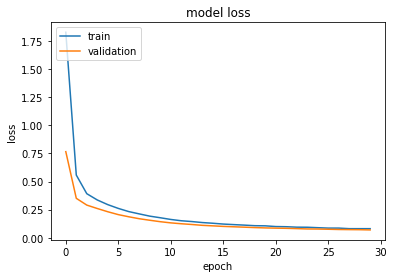

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()